<a href="https://colab.research.google.com/github/lailahach/Classification-binaire-avec-un-r-seau-de-neurones/blob/main/TP9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercice 1: Implémentation des modèles VGG19, ResNet34 et DenseNet121**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models

# =============================================
# Préparation du dataset (CIFAR-10 par exemple)
# =============================================
transform = transforms.Compose([
    transforms.Resize((128,128)),   # au lieu de 224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                     (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# ======================
# Chargement des modèles
# ======================
# Définir le device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

vgg19 = models.vgg19(weights=None)
vgg19.classifier[6] = nn.Linear(4096, 10)
vgg19 = vgg19.to(device)

# ResNet34
resnet34 = models.resnet34(pretrained=False, num_classes=10).to(device)

# DenseNet121
densenet121 = models.densenet121(pretrained=False, num_classes=10).to(device)

models_dict = {"VGG19": vgg19, "ResNet34": resnet34, "DenseNet121": densenet121}

# =======================
# Fonction d'entraînement
# =======================
def train_model(model, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0

        model.train()

        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        acc = 100. * correct / total
        print(f"Epoch {epoch+1}: Loss={running_loss/len(trainloader):.4f}, Train Acc={acc:.2f}%")

    return model

# =======================================
# Exemple d'entraînement
# =======================================
#trained_vgg19 = train_model(vgg19, epochs=5)
for name, model in models_dict.items():
    print(f"Training {name}...")
    trained_model = train_model(model, epochs=1)


Using device: cuda


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training VGG19...
Epoch 1: Loss=5.6981, Train Acc=10.02%
Training ResNet34...
Epoch 1: Loss=1.4052, Train Acc=48.57%
Training DenseNet121...
Epoch 1: Loss=1.2915, Train Acc=53.16%


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, applications

# ===========================
# Chargement dataset CIFAR-10
# ===========================
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = tf.image.resize(x_train, (224,224)) / 255.0
x_test  = tf.image.resize(x_test, (224,224)) / 255.0



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
#!pip install tensorflow

In [ ]:
# ======================
# Définition des modèles
# ======================
vgg19 = applications.VGG19(weights=None, classes=10, input_shape=(224,224,3))
resnet34 = applications.ResNet50(weights=None, classes=10, input_shape=(224,224,3))  # pas de ResNet34 natif, mais dispo via tf-keras-applications
densenet121 = applications.DenseNet121(weights=None, classes=10, input_shape=(224,224,3))

models_dict = {"VGG19": vgg19, "ResNet34": resnet34, "DenseNet121": densenet121}

# ==========================
# Compilation & Entraînement
# ==========================
for name, model in models_dict.items():
    print(f"\nTraining {name} ...")
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                        validation_data=(x_test, y_test))



Training VGG19 ...
Epoch 1/5
 32/782 ━━━━━━━━━━━━━━━━━━━━ 20:50:59 100s/step - accuracy: 0.0961 - loss: 92.0849

# **Exercice 2 : Utilisation de poids pré-entraînés**

In [ ]:
# =======================
#  1. Monter Google Drive
# =======================
from google.colab import drive
drive.mount('/content/drive')

# =======================
#  2. Décompresser PlantVillage.zip
# =======================
import zipfile
import os

zip_path = "/content/drive/MyDrive/PlantVillage.zip"
extract_path = "/content/PlantVillage"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset extrait !")
else:
    print("Dataset déjà extrait.")

# =======================
#  3. Créer dossiers train / val
# =======================
import shutil
import random

train_dir = "/content/PlantVillage/train"
val_dir   = "/content/PlantVillage/val"

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
    os.makedirs(val_dir)

    base_dir = os.path.join(extract_path, "plantvillage dataset/color")  # change en grayscale si besoin
    classes = os.listdir(base_dir)

    for class_name in classes:
        class_path = os.path.join(base_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        images = os.listdir(class_path)
        random.shuffle(images)

        split = int(0.8 * len(images))  # 80% train, 20% val
        train_images = images[:split]
        val_images   = images[split:]

        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    print(" Séparation train / val terminée")
else:
    print(" Dossiers train/val déjà prêts")

# =======================
#  4. Charger avec TensorFlow
# =======================
import tensorflow as tf
from tensorflow import keras

img_size = (128, 128)
batch_size = 32

train_ds = keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

# =======================
#  5. Prétraitement
# =======================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Mounted at /content/drive
Dataset déjà extrait.
 Dossiers train/val déjà prêts
Found 0 files belonging to 0 classes.


ValueError: No images found in directory /content/PlantVillage/train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

**Model Complet**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os, shutil, random

# ================================
# 1. Préparation du device
# ================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ================================
# 2. Préparation du dataset PlantVillage
# ================================
# Choix de la variante : color, grayscale ou segmented
source_dir = "/content/PlantVillage/plantvillage dataset/color"
base_dir = "/content/PlantVillage_split"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# ================================
# 3. Chargement des données
# ================================
data_dir = base_dir
batch_size = 32

data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {
    x: datasets.ImageFolder(root=f"{data_dir}/{x}", transform=data_transforms[x])
    for x in ["train", "val"]
}

dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=2)
    for x in ["train", "val"]
}

class_names = image_datasets["train"].classes
num_classes = len(class_names)
print(f"Nombre de classes: {num_classes}")

# ================================
# 4. Fonction de création de modèle
# ================================
def create_model(model_name, num_classes):
    if model_name == "vgg19":
        model = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)
        model.classifier[6] = nn.Linear(4096, num_classes)

    elif model_name == "resnet34":
        model = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
        model.fc = nn.Linear(model.fc.in_features, num_classes)

    elif model_name == "densenet121":
        model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)

    return model.to(device)

# ================================
# 5. Fonction d’entraînement
# ================================
def train_model(model, epochs=5, lr=1e-3):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, val_losses, val_accs = [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")
        model.train()
        running_loss = 0.0

        for inputs, labels in dataloaders["train"]:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(image_datasets["train"])
        train_losses.append(epoch_loss)

        # --- Évaluation ---
        model.eval()
        val_loss, correct = 0.0, 0
        with torch.no_grad():
            for inputs, labels in dataloaders["val"]:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                preds = torch.argmax(outputs, 1)
                correct += (preds == labels).sum().item()

        val_loss /= len(image_datasets["val"])
        acc = correct / len(image_datasets["val"])
        val_losses.append(val_loss)
        val_accs.append(acc)

        print(f"Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {acc:.4f}")

    return train_losses, val_losses, val_accs

# ================================
# 6. Exécution pour chaque modèle
# ================================
vgg19 = create_model("vgg19", num_classes)
resnet34 = create_model("resnet34", num_classes)
densenet121 = create_model("densenet121", num_classes)

vgg19_train, vgg19_val, vgg19_acc = train_model(vgg19, epochs=3)
resnet34_train, resnet34_val, resnet34_acc = train_model(resnet34, epochs=3)
densenet121_train, densenet121_val, densenet121_acc = train_model(densenet121, epochs=3)

# ================================
# 7. Visualisation des résultats
# ================================
plt.plot(vgg19_acc, label="VGG19")
plt.plot(resnet34_acc, label="ResNet34")
plt.plot(densenet121_acc, label="DenseNet121")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Comparaison des modèles sur PlantVillage")
plt.show()


Using device: cpu
✅ Dataset organisé en train/ et val/
Nombre de classes: 38
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [00:04<00:00, 134MB/s]


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 50.5MB/s]


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 45.8MB/s]



Epoch 1/3


KeyboardInterrupt: 

**ResNet34 sous échantillon**

In [ ]:
import os
import random
import shutil
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ===============================
# 1. Préparation Dataset (optimisé)
# ===============================
data_dir = "/content/PlantVillage"   # dossier original
train_dir = "/content/PlantVillage_split/train"
val_dir   = "/content/PlantVillage_split/val"

# Faire le split UNE SEULE FOIS
if not os.path.exists(train_dir) or not os.path.exists(val_dir):
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    split_ratio = 0.8  # 80% train / 20% val
    max_per_class = 200  # limiter à 200 images par classe pour test rapide

    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        images = os.listdir(class_path)
        random.shuffle(images)
        images = images[:max_per_class]  # limiter la taille

        split_point = int(len(images) * split_ratio)
        train_images = images[:split_point]
        val_images   = images[split_point:]

        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        for img in train_images:
            shutil.copy(os.path.join(class_path, img),
                        os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_path, img),
                        os.path.join(val_dir, class_name, img))
    print(" Split terminé (avec sous-échantillon).")
else:
    print(" Split déjà fait, on continue...")

# ===============================
# 2. Transforms & DataLoaders
# ===============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data   = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False, num_workers=2)

class_names = train_data.classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ===============================
# 3. Entraînement ResNet34 (seul)
# ===============================
model = models.resnet34(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

train_losses, val_losses = [], []
num_epochs = 2  # test rapide (peut monter ensuite)

for epoch in range(num_epochs):
    # --- Training ---
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct / total
    train_losses.append(train_loss)

    # --- Validation ---
    model.eval()
    running_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss = running_loss / len(val_loader)
    val_acc = 100 * correct / total
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f} Acc: {train_acc:.2f}% | "
          f"Val Loss: {val_loss:.4f} Acc: {val_acc:.2f}%")

# ===============================
# 4. Évaluation
# ===============================
y_true, y_pred = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = outputs.max(1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

print("\n Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=class_names))

# Courbes de loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Courbes de Loss (ResNet34)")
plt.show()


 Split terminé (avec sous-échantillon).


FileNotFoundError: Found no valid file for the classes test, train, val. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [ ]:
# =======================
#  1. Monter Google Drive
# =======================
from google.colab import drive
drive.mount('/content/drive')

# =======================
#  2. Décompresser PlantVillage.zip
# =======================
import zipfile
import os

zip_path = "/content/drive/MyDrive/PlantVillage.zip"
extract_path = "/content/PlantVillage"

if not os.path.exists(extract_path): #!unzip /content/drive/MyDrive/PlantVillage.zip -d /content/PlantVillage
    !unzip zip_path -d extract_path
    print("Dataset extrait !")
else:
    print("Dataset déjà extrait.")


Mounted at /content/drive
Dataset déjà extrait.


In [ ]:
!unzip /content/drive/MyDrive/PlantVillage.zip -d /content/PlantVillage

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/PlantVillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: /content/PlantVillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: /content/PlantVillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: /content/PlantVillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: /content/PlantVillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: /co

# **Exercice 3: Transfert learning avec EfficientNet et ViT**

In [6]:

# ============================================================
# Transfer Learning on PlantVillage with EfficientNet & ViT
# PyTorch + timm — Colab-ready, with Drive loading & auto split
# ============================================================

import os, time, json, random, shutil
from pathlib import Path
import numpy as np

# ---------------------------
# 0) Optional: Mount Google Drive (uncomment if needed)
# ---------------------------
# from google.colab import drive
# drive.mount('/content/drive')  # Then point SOURCE_DIR to a folder in Drive

# ---------------------------
# 1) Configs (adapt paths here)
# ---------------------------
#   SOURCE_DIR doit pointer vers le dossier qui contient directement les classes
#    (par ex. ".../plantvillage dataset/color", ou ".../grayscale", ou ".../segmented")
SOURCE_DIR = Path("/content/PlantVillage/plantvillage dataset/color")

# Dossier cible avec la structure standard attendue par le script: train/val/test
DATA_DIR   = Path("/content/PlantVillage")        # racine de sortie
SPLIT_DIR  = DATA_DIR                             # on garde train/val/test sous /content/PlantVillage
TRAIN_DIR  = SPLIT_DIR / "train"
VAL_DIR    = SPLIT_DIR / "val"
TEST_DIR   = SPLIT_DIR / "test"

OUTPUT_DIR = Path("/content/outputs_efficientnet_vit")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Split & sampling
TRAIN_RATIO   = 0.7  # 70% train
VAL_RATIO     = 0.15 # 15% val
TEST_RATIO    = 0.15 # 15% test
MAX_PER_CLASS = None  # ex: 300 pour accélérer les tests; None = prendre tout



# Training
MAX_PER_CLASS = 200
IMG_SIZE      = 224
BATCH_SIZE    = 16
WORKERS       = 2        # Colab: 2 ou 4
SEED          = 42
EPOCHS_FREEZE = 2
EPOCHS_FT     = 3
UNFREEZE_RATIO= 0.3      # Unfreeze top 30% layers during fine-tuning

# Reproducibility
import torch
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
USE_AMP = torch.cuda.is_available()  # mixed precision on GPU

# ---------------------------
# 2) Build train/val/test from SOURCE_DIR (only once)
# ---------------------------
IMG_EXTS = {".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff", ".webp"}

def is_image(fname: str) -> bool:
    return Path(fname).suffix.lower() in IMG_EXTS

def ensure_split_from_source(source_dir: Path, train_dir: Path, val_dir: Path, test_dir: Path,
                             train_ratio=0.7, val_ratio=0.15, test_ratio=0.15,
                             max_per_class=None):
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1."

    if train_dir.exists() and val_dir.exists() and test_dir.exists():
        print("Split already exists. Skipping creation.")
        return

    print("🔧 Creating train/val/test split from:", source_dir)
    for d in [train_dir, val_dir, test_dir]:
        d.mkdir(parents=True, exist_ok=True)

    classes = [c for c in os.listdir(source_dir) if (source_dir / c).is_dir()]
    classes.sort()
    for cls in classes:
        src_cls = source_dir / cls
        imgs = [f for f in os.listdir(src_cls) if is_image(f)]
        random.shuffle(imgs)

        if max_per_class is not None:
            imgs = imgs[:max_per_class]

        n = len(imgs)
        n_train = int(n * train_ratio)
        n_val   = int(n * val_ratio)
        n_test  = n - n_train - n_val

        splits = {
            train_dir / cls: imgs[:n_train],
            val_dir   / cls: imgs[n_train:n_train+n_val],
            test_dir  / cls: imgs[n_train+n_val:]
        }

        for dst_dir, files in splits.items():
            dst_dir.mkdir(parents=True, exist_ok=True)
            for f in files:
                src = src_cls / f
                dst = dst_dir / f
                if not dst.exists():
                    shutil.copy2(src, dst)
    print("Split done:", str(train_dir), str(val_dir), str(test_dir))

ensure_split_from_source(
    SOURCE_DIR, TRAIN_DIR, VAL_DIR, TEST_DIR,
    train_ratio=TRAIN_RATIO, val_ratio=VAL_RATIO, test_ratio=TEST_RATIO,
    max_per_class=MAX_PER_CLASS
)
for d in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    print(d, "classes:", [c for c in os.listdir(d) if (d/c).is_dir()])

# ---------------------------
# 3) Datasets & Dataloaders
# ---------------------------
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std),
])

val_tf = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(imagenet_mean, imagenet_std),
])

train_ds = datasets.ImageFolder(TRAIN_DIR, transform=train_tf)
val_ds   = datasets.ImageFolder(VAL_DIR, transform=val_tf)
test_ds  = datasets.ImageFolder(TEST_DIR, transform=val_tf)

num_classes = len(train_ds.classes)
print(f"Classes ({num_classes}):", train_ds.classes)

pin_memory = torch.cuda.is_available()
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=WORKERS, pin_memory=pin_memory)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=WORKERS, pin_memory=pin_memory)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=WORKERS, pin_memory=pin_memory)

# ---------------------------
# 4) Models (EfficientNet-B0, ViT-B/16) with timm
# ---------------------------
try:
    import timm
except ImportError:
    raise SystemExit(" timm not installed. Please run: pip install timm")

import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def build_model(name: str, num_classes: int):
    """Create a pretrained model and replace its classifier head."""
    name_l = name.lower()
    if name_l in ["efficientnet_b0", "efficientnet"]:
        model = timm.create_model("efficientnet_b0", pretrained=True, num_classes=num_classes)
    elif name_l in ["vit_b16", "vit", "vit_base_patch16_224", "vit_base_patch16_224.augreg_in21k_ft_in1k"]:
        # default vit_base_patch16_224
        model = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=num_classes)
    else:
        raise ValueError("Unknown model. Use 'efficientnet_b0' or 'vit_base_patch16_224'.")
    return model.to(device)

# ---------------------------
# 5) Utils: training, evaluation, plots
# ---------------------------
def evaluate(model, loader):
    model.eval()
    correct, total, loss_sum = 0, 0, 0.0
    criterion = nn.CrossEntropyLoss()
    all_targets, all_preds = [], []
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            loss = criterion(out, y)
            loss_sum += loss.item() * x.size(0)
            preds = out.argmax(1)
            correct += (preds == y).sum().item()
            total += y.size(0)
            all_targets.extend(y.detach().cpu().tolist())
            all_preds.extend(preds.detach().cpu().tolist())
    avg_loss = loss_sum / total
    acc = correct / total
    return avg_loss, acc, np.array(all_targets), np.array(all_preds)

def plot_curves(log, title, out_prefix):
    epochs = range(1, len(log["train_loss"]) + 1)

    plt.figure()
    plt.plot(epochs, log["train_loss"], label="train")
    plt.plot(epochs, log["val_loss"], label="val")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title(f"{title} — Loss"); plt.legend(); plt.grid(True)
    plt.savefig(f"{out_prefix}_loss.png", dpi=140)
    plt.close()

    plt.figure()
    plt.plot(epochs, log["train_acc"], label="train")
    plt.plot(epochs, log["val_acc"], label="val")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title(f"{title} — Accuracy"); plt.legend(); plt.grid(True)
    plt.savefig(f"{out_prefix}_acc.png", dpi=140)
    plt.close()

def count_trainable(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def unfreeze_top_layers(model, ratio: float = 0.3):
    """Unfreeze last 'ratio' of layers for fine-tuning (generic heuristic)."""
    layers = [m for m in model.modules()]
    cutoff = int(len(layers) * (1 - ratio))

    # freeze all
    for p in model.parameters():
        p.requires_grad = False
    # unfreeze top
    for m in layers[cutoff:]:
        for p in m.parameters(recurse=True):
            p.requires_grad = True

def train_two_stages(model_name: str,
                     epochs_freeze=EPOCHS_FREEZE, epochs_ft=EPOCHS_FT,
                     unfreeze_ratio=UNFREEZE_RATIO):
    model = build_model(model_name, num_classes)

    # Stage 1: freeze backbone, train only head
    for p in model.parameters():
        p.requires_grad = False

    # Re-enable classifier parameters depending on model attribute
    if hasattr(model, 'classifier') and isinstance(model.classifier, nn.Module):
        for p in model.classifier.parameters():
            p.requires_grad = True
    elif hasattr(model, 'head') and isinstance(model.head, nn.Module):  # ViT in timm
        for p in model.head.parameters():
            p.requires_grad = True
    else:
        # fallback: unfreeze last layer's params
        for p in list(model.parameters())[-2:]:
            p.requires_grad = True

    optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                            lr=3e-4, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()
    scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)

    log = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    # ---- Stage 1 training ----
    for epoch in range(1, epochs_freeze + 1):
        model.train()
        tloss, tcorrect, ttotal = 0.0, 0, 0
        t0 = time.time()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad(set_to_none=True)
            with torch.cuda.amp.autocast(enabled=USE_AMP):
                out = model(x)
                loss = criterion(out, y)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            tloss += loss.item() * x.size(0)
            preds = out.argmax(1)
            tcorrect += (preds == y).sum().item()
            ttotal += y.size(0)
        train_loss = tloss / ttotal
        train_acc  = tcorrect / ttotal

        val_loss, val_acc, _, _ = evaluate(model, val_loader)
        log["train_loss"].append(train_loss)
        log["val_loss"].append(val_loss)
        log["train_acc"].append(train_acc)
        log["val_acc"].append(val_acc)

        print(f"[Stage1][{model_name}] Epoch {epoch}/{epochs_freeze} "
              f"| Train {train_loss:.4f}/{train_acc:.4f} "
              f"| Val {val_loss:.4f}/{val_acc:.4f} "
              f"| {(time.time()-t0):.1f}s")

    # ---- Stage 2: fine-tune top layers ----
    unfreeze_top_layers(model, ratio=unfreeze_ratio)
    print(f"🔓 Unfreezing top {int(unfreeze_ratio*100)}% layers. "
          f"Trainable params: {count_trainable(model):,}")
    optimizer = optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                            lr=1e-4, weight_decay=1e-4)

    for epoch in range(1, epochs_ft + 1):
        model.train()
        tloss, tcorrect, ttotal = 0.0, 0, 0
        t0 = time.time()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad(set_to_none=True)
            with torch.cuda.amp.autocast(enabled=USE_AMP):
                out = model(x)
                loss = criterion(out, y)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            tloss += loss.item() * x.size(0)
            preds = out.argmax(1)
            tcorrect += (preds == y).sum().item()
            ttotal += y.size(0)
        train_loss = tloss / ttotal
        train_acc  = tcorrect / ttotal

        val_loss, val_acc, _, _ = evaluate(model, val_loader)
        log["train_loss"].append(train_loss)
        log["val_loss"].append(val_loss)
        log["train_acc"].append(train_acc)
        log["val_acc"].append(val_acc)

        print(f"[Stage2][{model_name}] Epoch {epoch}/{epochs_ft} "
              f"| Train {train_loss:.4f}/{train_acc:.4f} "
              f"| Val {val_loss:.4f}/{val_acc:.4f} "
              f"| {(time.time()-t0):.1f}s")

    # Save training curves
    with open(OUTPUT_DIR / f"{model_name}_history.json", "w") as f:
        json.dump(log, f)
    plot_curves(log, model_name, str(OUTPUT_DIR / model_name))

    # Test evaluation
    test_loss, test_acc, y_true, y_pred = evaluate(model, test_loader)
    print(f"\n[Test][{model_name}] Loss: {test_loss:.4f} | Acc: {test_acc:.4f}")

    # Classification report & confusion matrix
    from sklearn.metrics import classification_report, confusion_matrix
    report = classification_report(y_true, y_pred, target_names=train_ds.classes, digits=4)
    print(report)
    with open(OUTPUT_DIR / f"{model_name}_report.txt", "w") as f:
        f.write(report)

    # Confusion matrix plot
    import seaborn as sns
    import matplotlib.pyplot as plt
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 8))
    sns.heatmap(cm, cmap="Blues", square=True, cbar=True)
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / f"{model_name}_confusion.png", dpi=150)
    plt.close()

    # Save model weights
    torch.save(model.state_dict(), OUTPUT_DIR / f"{model_name}_finetuned.pt")

    return {"test_loss": test_loss, "test_acc": test_acc}

# ---------------------------
# 6) Run both models
# ---------------------------
results = {}
for name in ["efficientnet_b0", "vit_base_patch16_224"]:
    print(f"\n===== Training {name} on PlantVillage =====")
    results[name] = train_two_stages(name)

# Summary CSV
import csv
with open(OUTPUT_DIR / "summary_results.csv", "w", newline="") as f:
    w = csv.writer(f)
    w.writerow(["model", "test_loss", "test_acc"])
    for k, v in results.items():
        w.writerow([k, v["test_loss"], v["test_acc"]])

print("\n Done. Outputs saved to:", OUTPUT_DIR.resolve())


Using device: cpu
🔧 Creating train/val/test split from: /content/PlantVillage/plantvillage dataset/color
Split done: /content/PlantVillage/train /content/PlantVillage/val /content/PlantVillage/test
/content/PlantVillage/train classes: ['Apple___Apple_scab', 'Tomato___Leaf_Mold', 'Apple___Black_rot', 'Raspberry___healthy', 'Pepper,_bell___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Corn_(maize)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Blueberry___healthy', 'Potato___Late_blight', 'Pepper,_bell___Bacterial_spot', 'Strawberry___Leaf_scorch', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Esca_(Black_Measles)', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Strawberry___healthy', 'Cherry_(including_sour)___healthy', 'Potato___Early_blight', 'Tomato___Bacterial_spot', 'Grape___Black_rot', 'Soybean___healthy', 'Apple___Cedar_apple_

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

/tmp/ipython-input-3883718965.py:261: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)
/tmp/ipython-input-3883718965.py:273: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


[Stage1][efficientnet_b0] Epoch 1/2 | Train 2.9940/0.2153 | Val 2.0622/0.4611 | 638.4s
[Stage1][efficientnet_b0] Epoch 2/2 | Train 1.6256/0.5957 | Val 1.2810/0.6811 | 640.4s
🔓 Unfreezing top 30% layers. Trainable params: 3,109,666


/tmp/ipython-input-3883718965.py:312: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


[Stage2][efficientnet_b0] Epoch 1/3 | Train 0.5608/0.8441 | Val 0.2394/0.9320 | 825.9s
[Stage2][efficientnet_b0] Epoch 2/3 | Train 0.2090/0.9406 | Val 0.1389/0.9638 | 849.4s
[Stage2][efficientnet_b0] Epoch 3/3 | Train 0.1194/0.9669 | Val 0.1192/0.9594 | 804.5s

[Test][efficientnet_b0] Loss: 0.1503 | Acc: 0.9559
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     1.0000    0.9667    0.9831        30
                                 Apple___Black_rot     1.0000    1.0000    1.0000        30
                          Apple___Cedar_apple_rust     1.0000    1.0000    1.0000        30
                                   Apple___healthy     1.0000    0.9667    0.9831        30
                               Blueberry___healthy     1.0000    0.9667    0.9831        30
          Cherry_(including_sour)___Powdery_mildew     1.0000    1.0000    1.0000        30
                 Cherry_(including_sour)__

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

/tmp/ipython-input-3883718965.py:261: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)
/tmp/ipython-input-3883718965.py:273: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


[Stage1][vit_base_patch16_224] Epoch 1/2 | Train 1.2510/0.7249 | Val 0.5001/0.8905 | 5143.2s


KeyboardInterrupt: 

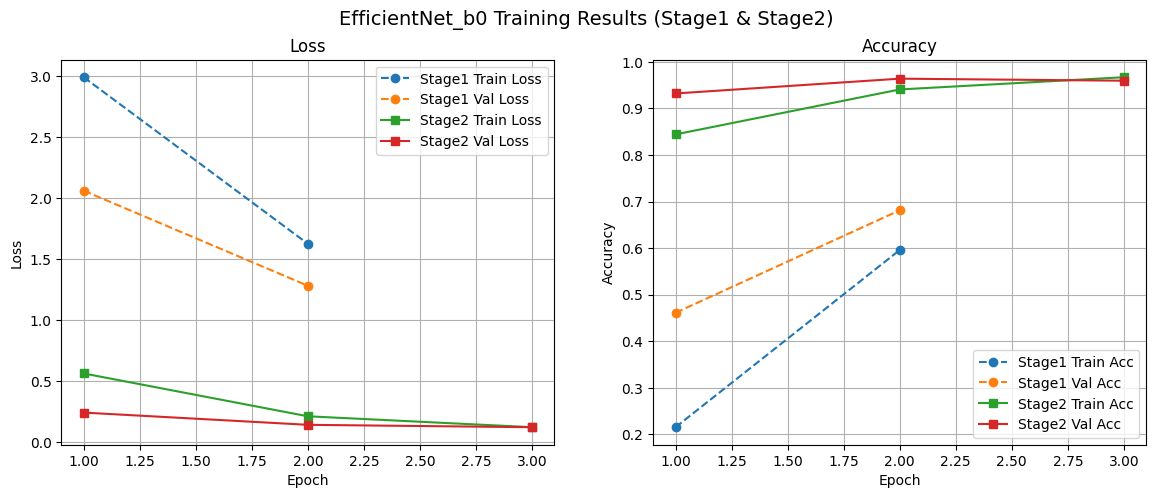

Test Loss = 0.1503 | Test Accuracy = 0.9559


In [7]:
import matplotlib.pyplot as plt

# ===============================
# Résultats Stage1
# ===============================
stage1_train_loss = [2.9940, 1.6256]
stage1_train_acc  = [0.2153, 0.5957]
stage1_val_loss   = [2.0622, 1.2810]
stage1_val_acc    = [0.4611, 0.6811]

# ===============================
# Résultats Stage2
# ===============================
stage2_train_loss = [0.5608, 0.2090, 0.1194]
stage2_train_acc  = [0.8441, 0.9406, 0.9669]
stage2_val_loss   = [0.2394, 0.1389, 0.1192]
stage2_val_acc    = [0.9320, 0.9638, 0.9594]

# ===============================
# Tracé
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# --- Courbes de Loss ---
axes[0].plot(range(1, len(stage1_train_loss)+1), stage1_train_loss, 'o--', label="Stage1 Train Loss")
axes[0].plot(range(1, len(stage1_val_loss)+1), stage1_val_loss, 'o--', label="Stage1 Val Loss")
axes[0].plot(range(1, len(stage2_train_loss)+1), stage2_train_loss, 's-', label="Stage2 Train Loss")
axes[0].plot(range(1, len(stage2_val_loss)+1), stage2_val_loss, 's-', label="Stage2 Val Loss")
axes[0].set_title("Loss")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True)

# --- Courbes d'Accuracy ---
axes[1].plot(range(1, len(stage1_train_acc)+1), stage1_train_acc, 'o--', label="Stage1 Train Acc")
axes[1].plot(range(1, len(stage1_val_acc)+1), stage1_val_acc, 'o--', label="Stage1 Val Acc")
axes[1].plot(range(1, len(stage2_train_acc)+1), stage2_train_acc, 's-', label="Stage2 Train Acc")
axes[1].plot(range(1, len(stage2_val_acc)+1), stage2_val_acc, 's-', label="Stage2 Val Acc")
axes[1].set_title("Accuracy")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("EfficientNet_b0 Training Results (Stage1 & Stage2)", fontsize=14)
plt.show()

# ===============================
# Résultat final test
# ===============================
print("Test Loss = 0.1503 | Test Accuracy = 0.9559")


/tmp/ipython-input-2676839154.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x="F1-score", y="Classe", palette="viridis")


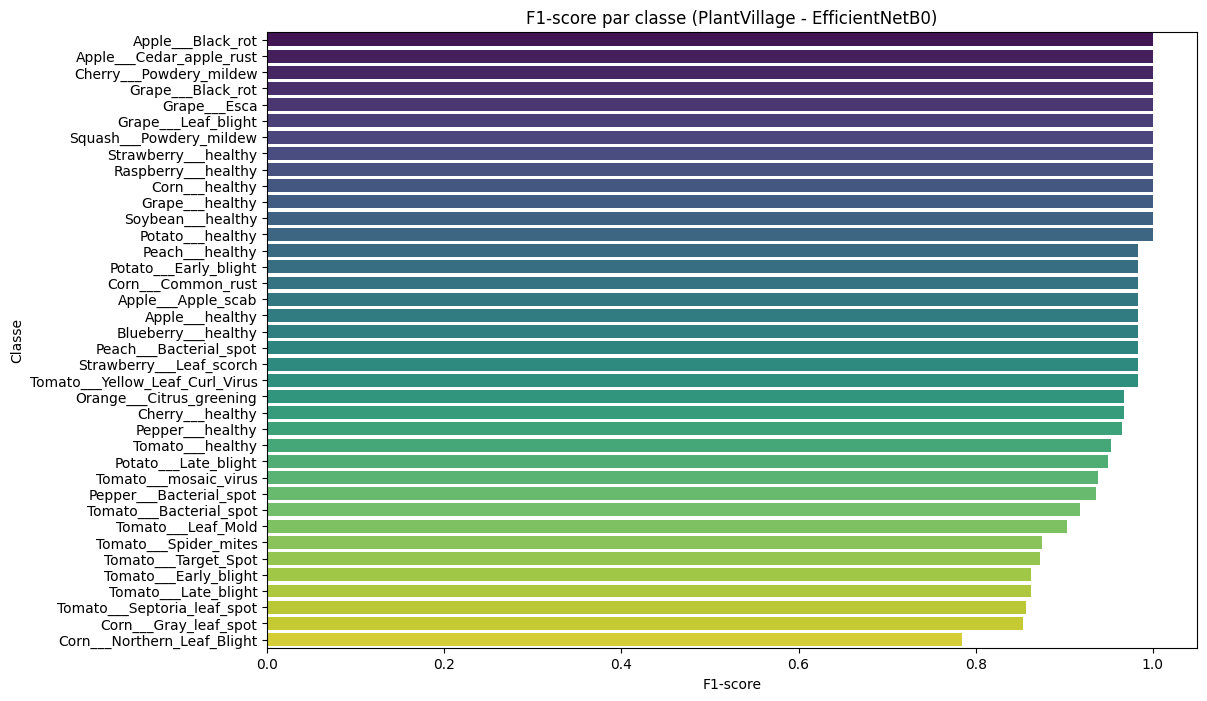

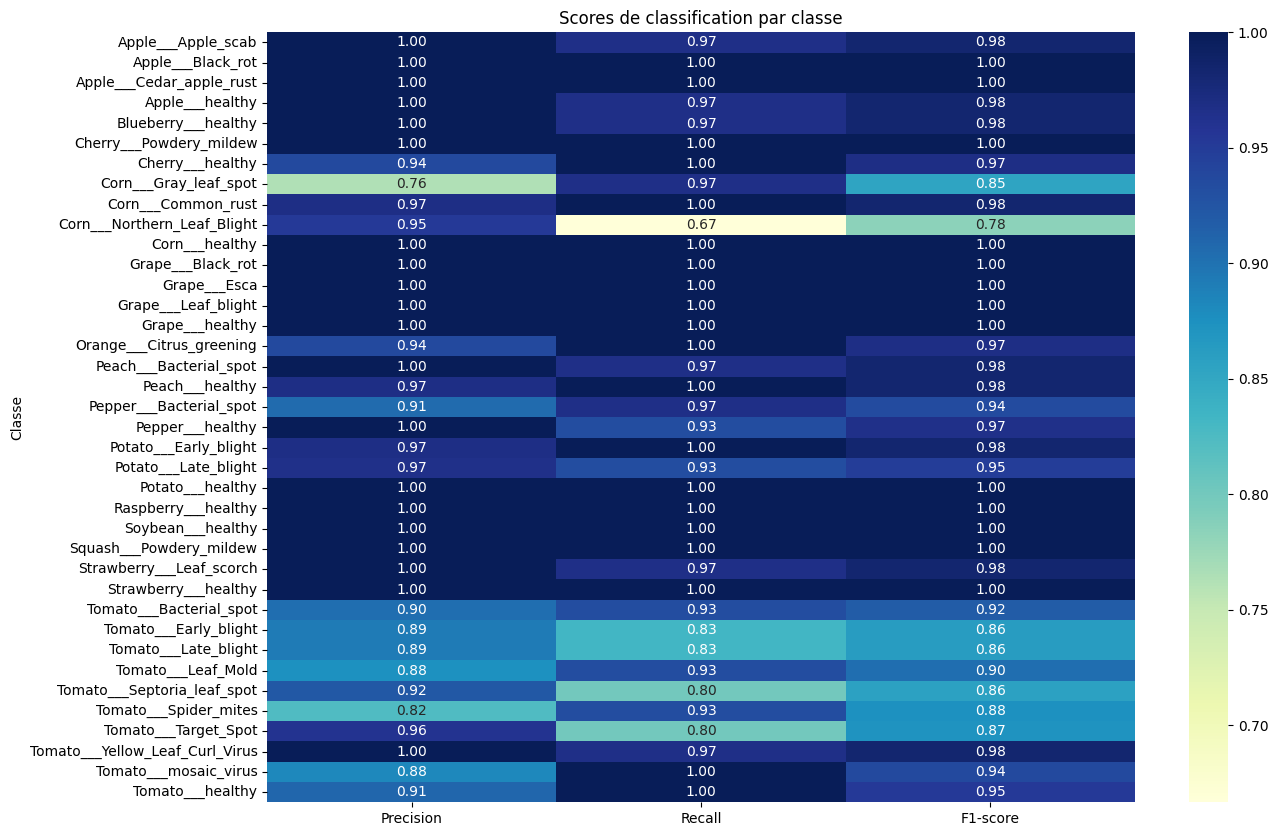

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ================================
# 1. Copier tes résultats dans un dictionnaire
# ================================
results = {
    "Classe": [
        "Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy",
        "Blueberry___healthy","Cherry___Powdery_mildew","Cherry___healthy",
        "Corn___Gray_leaf_spot","Corn___Common_rust","Corn___Northern_Leaf_Blight","Corn___healthy",
        "Grape___Black_rot","Grape___Esca","Grape___Leaf_blight","Grape___healthy",
        "Orange___Citrus_greening","Peach___Bacterial_spot","Peach___healthy",
        "Pepper___Bacterial_spot","Pepper___healthy","Potato___Early_blight",
        "Potato___Late_blight","Potato___healthy","Raspberry___healthy",
        "Soybean___healthy","Squash___Powdery_mildew","Strawberry___Leaf_scorch","Strawberry___healthy",
        "Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold",
        "Tomato___Septoria_leaf_spot","Tomato___Spider_mites","Tomato___Target_Spot",
        "Tomato___Yellow_Leaf_Curl_Virus","Tomato___mosaic_virus","Tomato___healthy"
    ],
    "Precision": [
        1.0,1.0,1.0,1.0,1.0,1.0,0.9375,0.7632,0.9677,0.9524,1.0,1.0,1.0,1.0,1.0,
        0.9375,1.0,0.9677,0.9062,1.0,0.9677,0.9655,1.0,1.0,1.0,1.0,1.0,1.0,
        0.9032,0.8929,0.8929,0.8750,0.9231,0.8235,0.9600,1.0,0.8824,0.9091
    ],
    "Recall": [
        0.9667,1.0,1.0,0.9667,0.9667,1.0,1.0,0.9667,1.0,0.6667,1.0,1.0,1.0,1.0,1.0,
        1.0,0.9667,1.0,0.9667,0.9333,1.0,0.9333,1.0,1.0,1.0,1.0,0.9667,1.0,
        0.9333,0.8333,0.8333,0.9333,0.8000,0.9333,0.8000,0.9667,1.0,1.0
    ],
    "F1-score": [
        0.9831,1.0,1.0,0.9831,0.9831,1.0,0.9677,0.8529,0.9836,0.7843,1.0,1.0,1.0,1.0,1.0,
        0.9677,0.9831,0.9836,0.9355,0.9655,0.9836,0.9492,1.0,1.0,1.0,1.0,0.9831,1.0,
        0.9180,0.8621,0.8621,0.9032,0.8571,0.8750,0.8727,0.9831,0.9375,0.9524
    ]
}

df = pd.DataFrame(results)

# ================================
# 2. Barplot F1-score par classe
# ================================
plt.figure(figsize=(12,8))
df_sorted = df.sort_values("F1-score", ascending=False)
sns.barplot(data=df_sorted, x="F1-score", y="Classe", palette="viridis")
plt.title("F1-score par classe (PlantVillage - EfficientNetB0)")
plt.xlabel("F1-score")
plt.ylabel("Classe")
plt.show()

# ================================
# 3. Heatmap des trois métriques (Precision, Recall, F1-score)
# ================================
plt.figure(figsize=(14,10))
metrics_df = df.set_index("Classe")[["Precision","Recall","F1-score"]]
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Scores de classification par classe")
plt.show()
